In [1]:
import pandas as pd
import numpy as np
import numpy.random as rnd
import datetime
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from os import listdir
from os.path import join
import os

Images: https://drive.google.com/drive/folders/1gtB8LEDUTuVtdFvxofL2o6_tyxctWYHj?usp=sharing

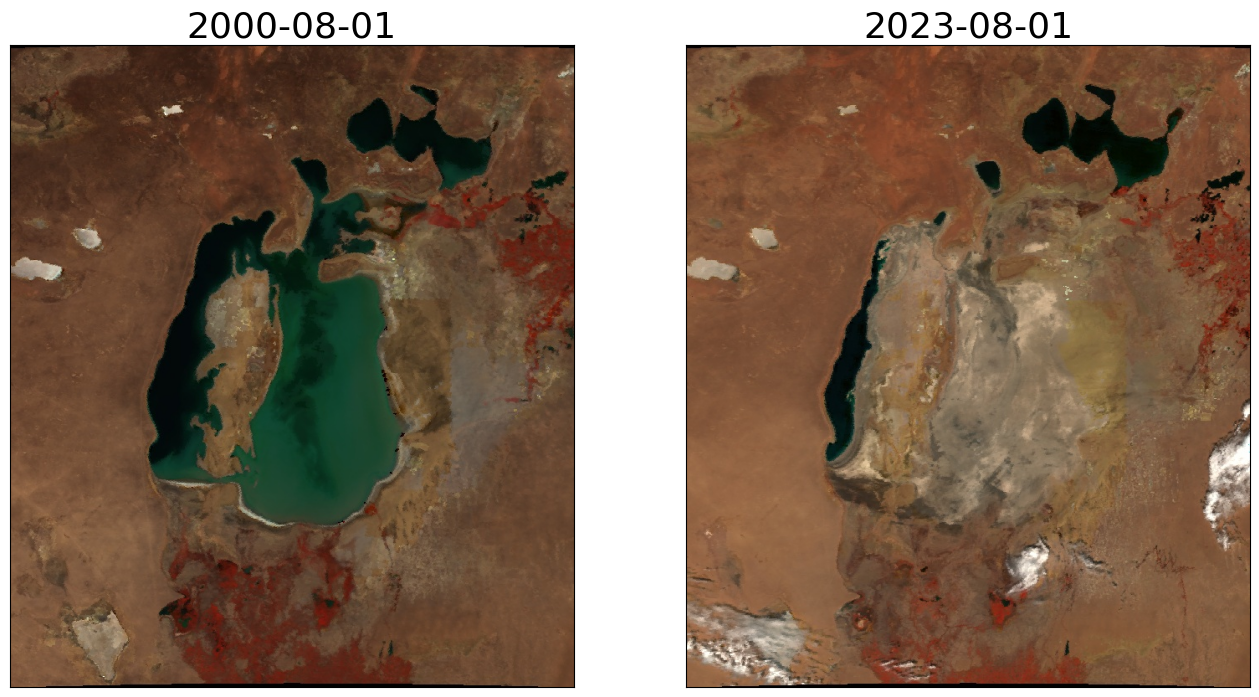

In [3]:
img = mpimg.imread('MOD_01.jpg')
img2 = mpimg.imread('MOD_24.jpg')

fig, ax = plt.subplots(ncols=2, figsize=(16,9))
ax[0].imshow(img)
ax[1].imshow(img2)
for i in range(2):
  ax[i].set_facecolor('black')
  ax[i].set_xticks([])
  ax[i].set_yticks([])
ax[0].set_title('2000-08-01', fontsize=26)
ax[1].set_title('2023-08-01', fontsize=26)
plt.show()

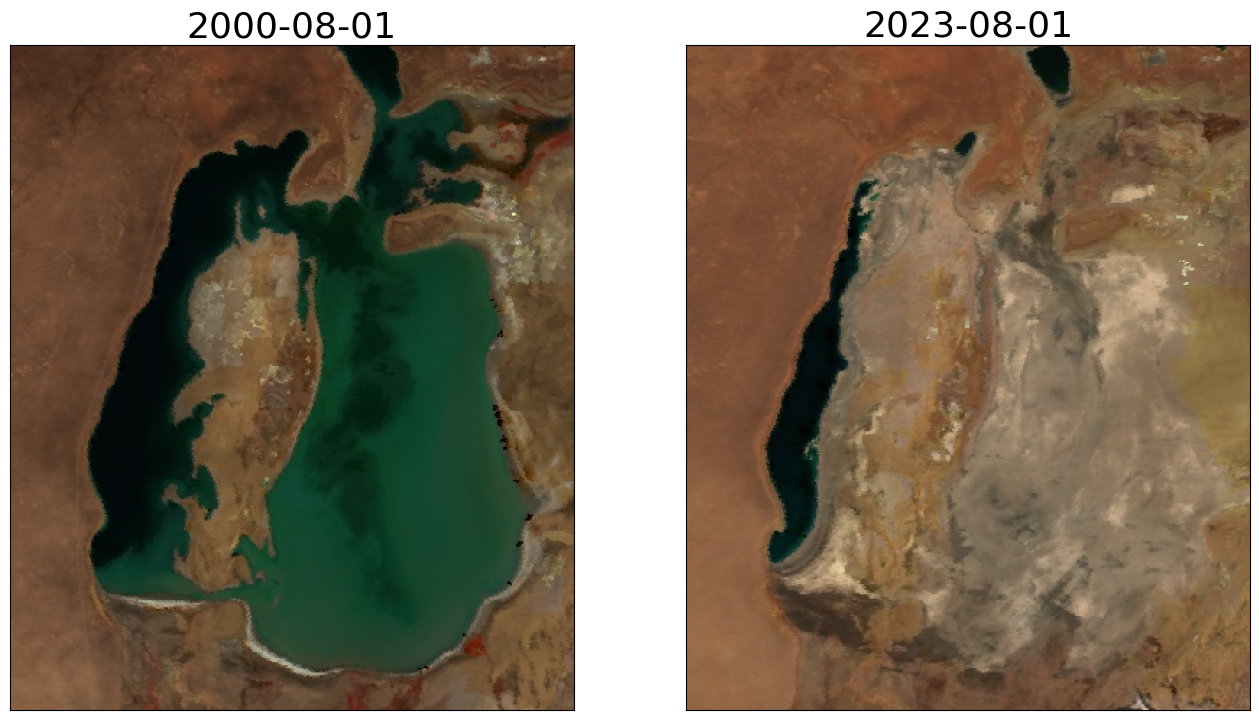

In [4]:
'''Zooming in'''
img = img[140:600,110:500,:]
img2 = img2[140:600,110:500,:]

fig, ax = plt.subplots(ncols=2, figsize=(16,9))
ax[0].imshow(img)
ax[1].imshow(img2)
for i in range(2):
  ax[i].set_facecolor('black')
  ax[i].set_xticks([])
  ax[i].set_yticks([])
ax[0].set_title('2000-08-01', fontsize=26)
ax[1].set_title('2023-08-01', fontsize=26)
plt.show()

In [5]:
df = pd.DataFrame({'R': img[:,:, 0].flatten(), 'G': img[:,:, 1].flatten(), 'B':img[:,:, 2].flatten()})
df2 = pd.DataFrame({'R': img2[:,:, 0].flatten(), 'G': img2[:,:, 1].flatten(), 'B':img2[:,:, 2].flatten()})

In [6]:
'''k-Means implementation'''
def distance(data, centroids, kind):
  #kind - euclidian, manhattan, chebyshev
  cols=list()
  for i in range(1,k+1):
    if kind=='euclidean':
      data[f'C{i}'] = ((centroids[i-1][0]-data.R)**2+(centroids[i-1][1]-data.G)**2+(centroids[i-1][2]-data.B)**2)**0.5
    elif kind=='manhattan':
      data[f'C{i}'] = abs(centroids[i-1][0]-data.R)+abs(centroids[i-1][1]-data.G)+abs(centroids[i-1][2]-data.B)
    elif kind=='chebyshev':
      merged=pd.concat([centroids[i-1][0]-data.R, centroids[i-1][1]-data.G, centroids[i-1][2]-data.B], axis=1)
      data[f'C{i}'] = merged.max(axis=1)
    cols.append(f'C{i}')
  data['Class'] = data[cols].abs().idxmin(axis=1)
  return data

def kmeans(data, K, kind):
  print(10*'-', f'k={3}\tDistance={kind}', '-'*10)
  L = list()
  new_centroids = data.sample(K).values

  data = distance(data.copy(), new_centroids, kind)
  old_centroids = new_centroids.copy()
  new_centroids = np.array([data[data.Class == Class][['R', 'G', 'B']].mean().values for Class in data.loc[:,'C1':f'C{K}'].columns])
  i = 1
  print(f'Iteration: {i}\tDistance: {abs(new_centroids.mean()-old_centroids.mean())}')
  while abs(new_centroids.mean()-old_centroids.mean())>0.001:
    L.append(abs(new_centroids.mean()-old_centroids.mean()))
    data = distance(data, new_centroids, kind)
    old_centroids = new_centroids.copy()
    new_centroids = np.array([data[data.Class == Class][['R', 'G', 'B']].mean().values for Class in data.loc[:,'C1':f'C{K}'].columns])
    #if np.isnan(new_centroids).any(): #in case there is an empty cluster
    i+=1
    print(f'Iteration: {i}\tDistance: {abs(new_centroids.mean()-old_centroids.mean())}')
  print(f"k-Means has ended with {i} iteratinons")
  return data, L

In [90]:
k = 3
segmented_1, segmented_2, distances_1, distances_2 = {}, {}, {}, {}
segmented_1['euclidean'], distances_1['euclidean'] = kmeans(df, k, 'euclidean')
segmented_2['euclidean'], distances_2['euclidean'] = kmeans(df2, k, 'euclidean')
segmented_1['manhattan'], distances_1['manhattan'] = kmeans(df, k, 'manhattan')
segmented_2['manhattan'], distances_2['manhattan'] = kmeans(df2, k, 'manhattan')
segmented_1['chebyshev'], distances_1['chebyshev'] = kmeans(df, k, 'chebyshev')
segmented_2['chebyshev'], distances_2['chebyshev'] = kmeans(df2, k, 'chebyshev')

---------- k=3	Distance=euclidean ----------
Iteration: 1	Distance: 27.619442674294042
Iteration: 2	Distance: 2.3974852157740685
Iteration: 3	Distance: 2.0632357310823863
Iteration: 4	Distance: 1.3823073970329744
Iteration: 5	Distance: 0.9884610404063494
Iteration: 6	Distance: 0.815406826554522
Iteration: 7	Distance: 0.5657795408195909
Iteration: 8	Distance: 0.40724204524315866
Iteration: 9	Distance: 0.22364445876941375
Iteration: 10	Distance: 0.19638275801920457
Iteration: 11	Distance: 0.10544604379059308
Iteration: 12	Distance: 0.03028786833593955
Iteration: 13	Distance: 0.009225000775565206
Iteration: 14	Distance: 0.031631594454829326
Iteration: 15	Distance: 0.013539927079754932
Iteration: 16	Distance: 0.00880425853861766
Iteration: 17	Distance: 0.005265373497735482
Iteration: 18	Distance: 0.0003380316332197708
k-Means has ended with 18 iteratinons
---------- k=3	Distance=euclidean ----------
Iteration: 1	Distance: 2.508432707038139
Iteration: 2	Distance: 1.3855476396392277
Iteratio

# Visualization

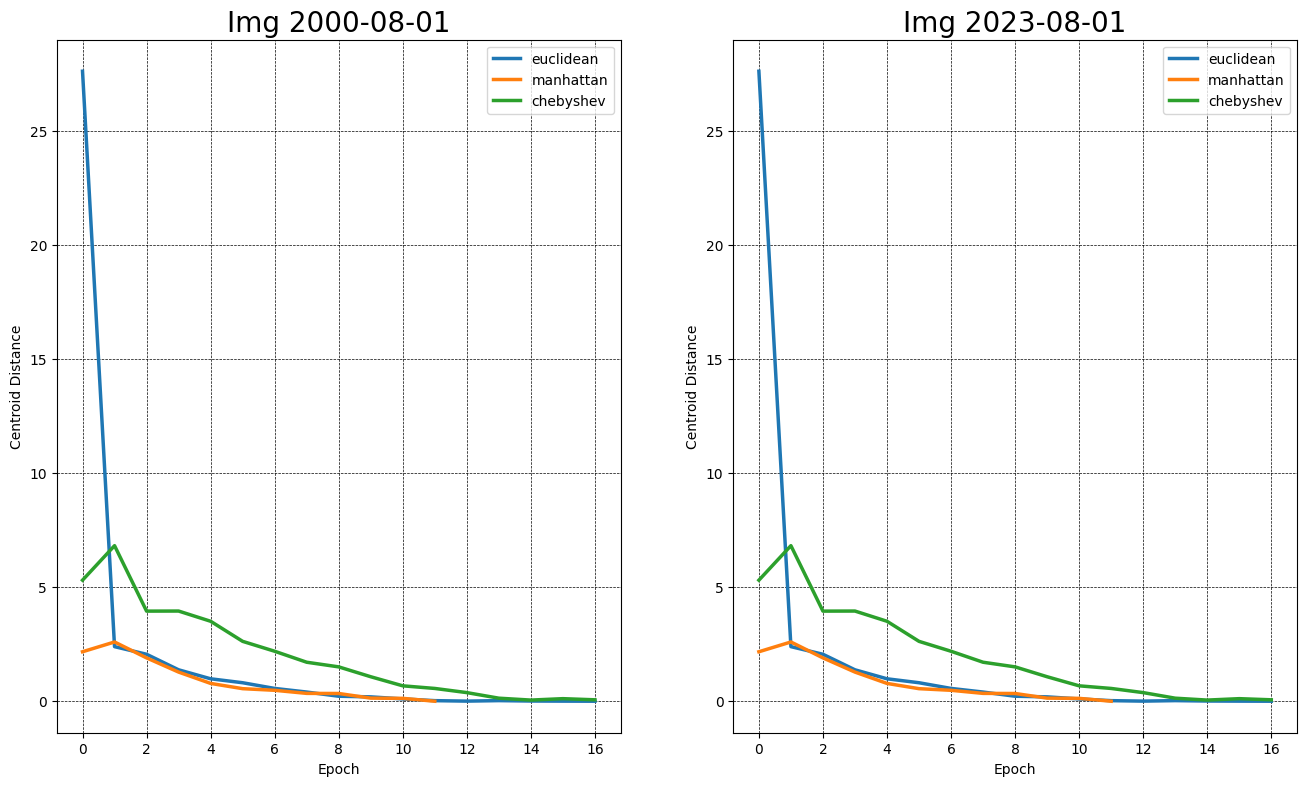

In [91]:
fig, ax = plt.subplots(ncols=2, figsize=(16,9))
for key in distances_1.keys():
  ax[0].plot(distances_1[key], lw=2.5, label=key)
  ax[1].plot(distances_1[key], lw=2.5, label=key)

for i in range(2):
  ax[i].set_xlabel('Epoch')
  ax[i].set_ylabel('Centroid Distance')
  ax[i].grid(color='black', ls='--', lw=0.5)
  ax[i].legend()

ax[0].set_title('Img 2000-08-01',fontsize=20)
ax[1].set_title('Img 2023-08-01',fontsize=20)
plt.savefig('comparison.png')
plt.show()  

In [93]:
d = {'C1':0, 'C2': 1, 'C3':2}
for key in segmented_1.keys():
  segmented_1[key].Class = segmented_1[key].Class.apply(lambda x: d[x])
  segmented_2[key].Class = segmented_2[key].Class.apply(lambda x: d[x])

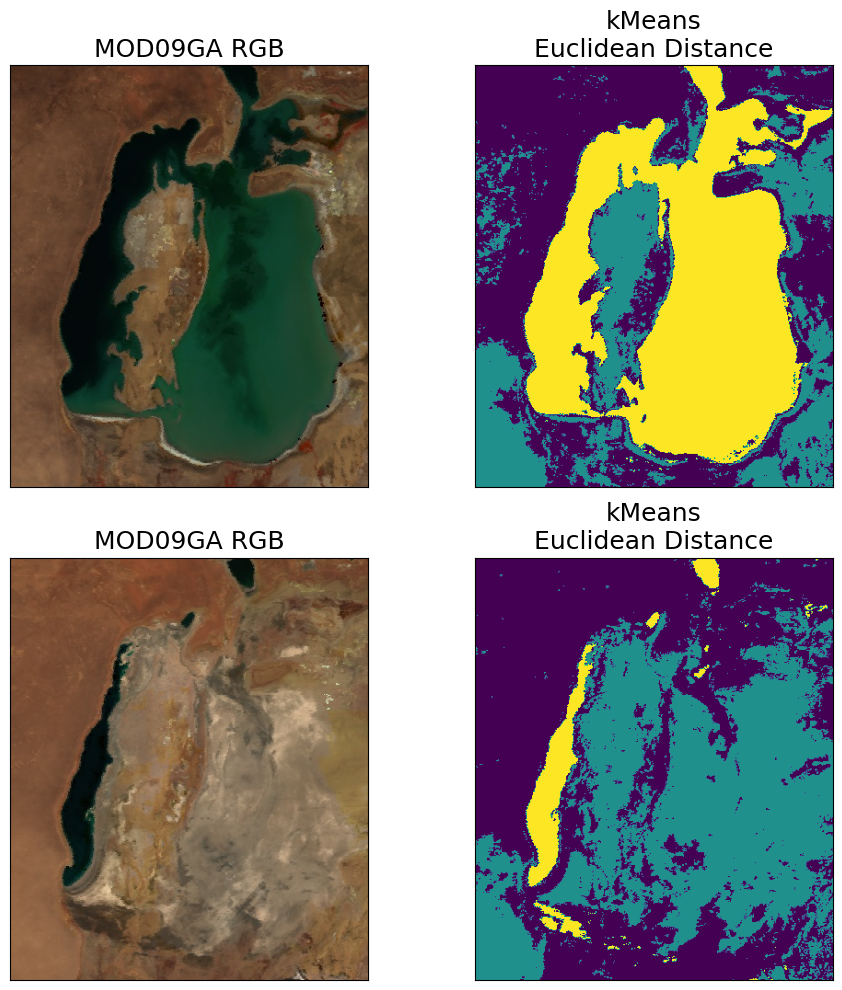

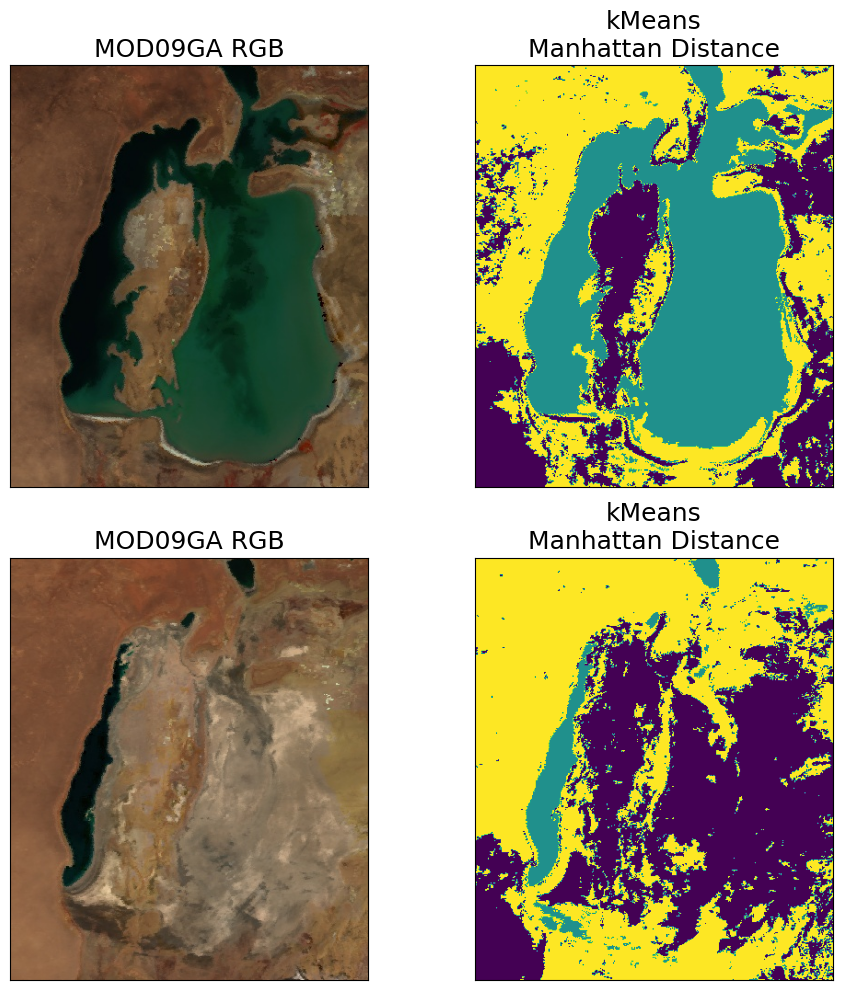

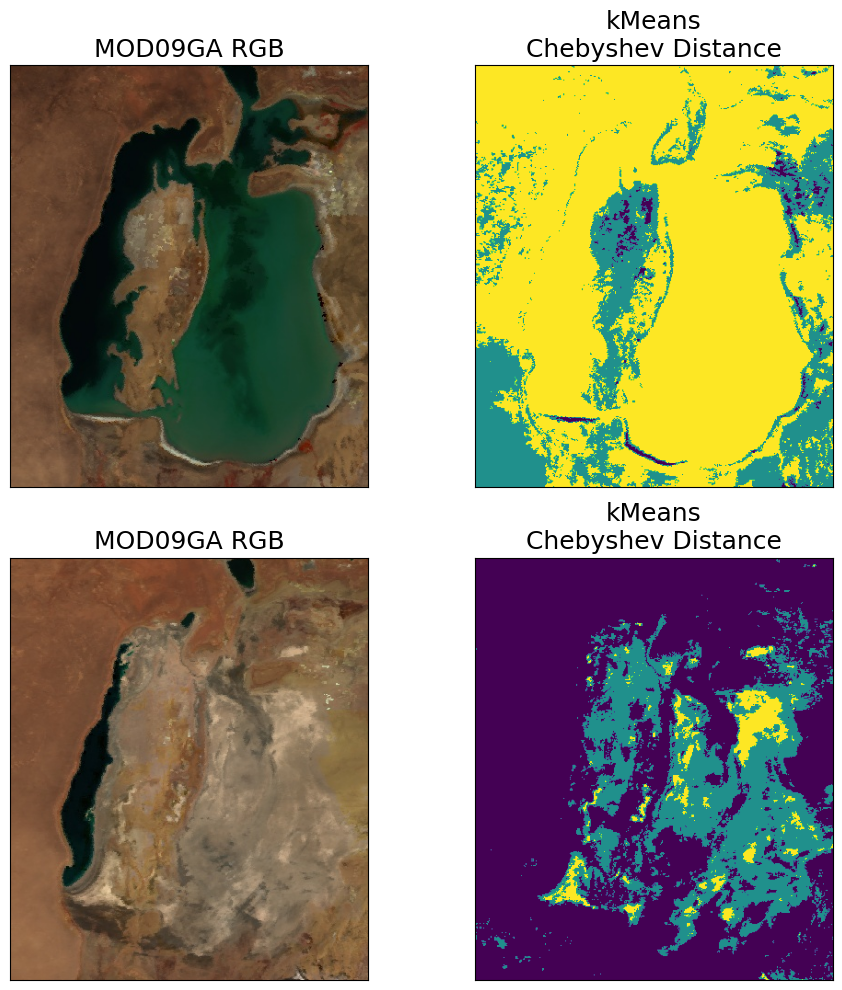

In [94]:
for key in segmented_1.keys():
  fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10,10))
  ax[0, 0].imshow(img)
  ax[0, 1].imshow(segmented_1[key].Class.values.reshape(460,390))
  ax[0, 0].set_title('MOD09GA RGB', fontsize=18)
  ax[0, 1].set_title(f'kMeans\n{key[0].upper()+key[1:]} Distance', fontsize=18)

  ax[1, 0].imshow(img2)
  ax[1, 1].imshow(segmented_2[key].Class.values.reshape(460,390))
  ax[1, 0].set_title('MOD09GA RGB', fontsize=18)
  ax[1, 1].set_title(f'kMeans\n{key[0].upper()+key[1:]} Distance', fontsize=18)

  for i in range(2):
    for j in range(2):
      ax[i, j].set_facecolor('black')
      ax[i, j].set_xticks([])
      ax[i, j].set_yticks([])

  plt.savefig(f'{key}.png')
  plt.tight_layout()
  plt.show()

# Scores

In [12]:
from sklearn.metrics import silhouette_score

In [13]:
scores_1, scores_2 = {}, {}
for key in segmented_1.keys():
  scores_1[key]=round(silhouette_score(segmented_1[key].loc[:, :'C3'], segmented_1[key].Class, metric=key),2)
  scores_2[key]=round(silhouette_score(segmented_2[key].loc[:, :'C3'], segmented_2[key].Class, metric=key),2)
  print(f'Distance: {key}\t Img 1: {scores_1[key]}\t Img 2: {scores_2[key]}')

Distance: euclidean	 Img 1: 0.55	 Img 2: 0.54
Distance: manhattan	 Img 1: 0.5	 Img 2: 0.56
Distance: chebyshev	 Img 1: 0.21	 Img 2: 0.29


# Water Surface Change

In [15]:
np.count_nonzero(segmented_1[key].Class.values == 1)

40204

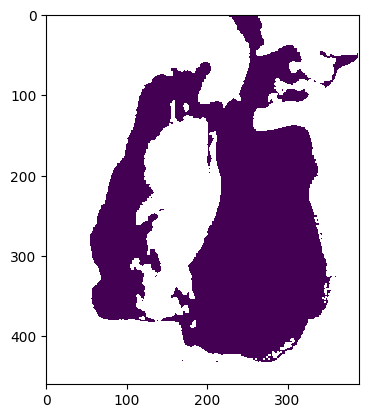

In [97]:
IMG = segmented_1['euclidean'].Class.values.reshape(460,390).copy().astype(float)
mask = IMG!= 2
IMG[mask] = np.nan
plt.imshow(IMG)

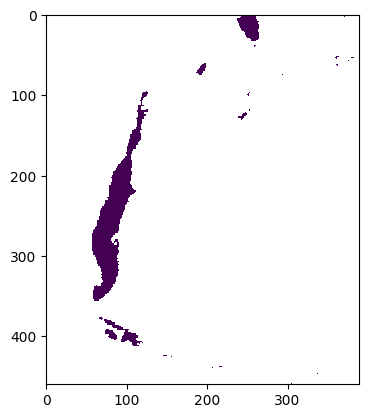

In [99]:
IMG = segmented_2['euclidean'].Class.values.reshape(460,390).copy().astype(float)
mask = IMG!= 2
IMG[mask] = np.nan
plt.imshow(IMG)

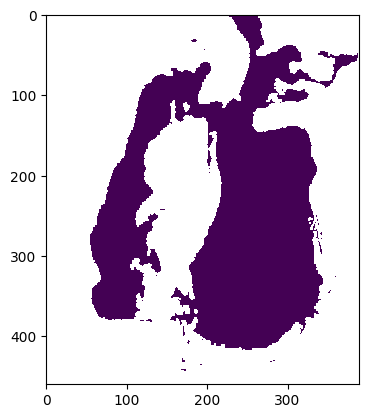

In [101]:
IMG = segmented_1['manhattan'].Class.values.reshape(460,390).copy().astype(float)
mask = IMG!= 1
IMG[mask] = np.nan
plt.imshow(IMG)

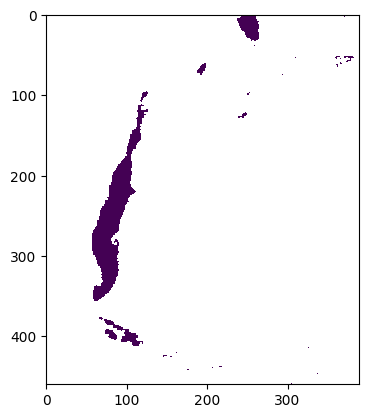

In [102]:
IMG = segmented_2['manhattan'].Class.values.reshape(460,390).copy().astype(float)
mask = IMG!= 1
IMG[mask] = np.nan
plt.imshow(IMG)

In [109]:
for metric, Class in zip(['euclidean', 'manhattan'], [2,1]):
  img1_water = np.count_nonzero(segmented_1[metric].Class.values == Class)*500*500*1e-6
  img2_water = np.count_nonzero(segmented_2[metric].Class.values == Class)*500*500*1e-6

  print(f'Distance: {metric}\tWater Area Before: {round(img1_water)}km\u00b2\tWater Area After: {round(img2_water)}km\u00b2\tChange: -{100-round(img2_water/img1_water*100)}%')

Distance: euclidean	Water Area Before: 17125km²	Water Area After: 1960km²	Change: -89%
Distance: manhattan	Water Area Before: 16244km²	Water Area After: 2003km²	Change: -88%
